In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# Finding discrete values in the dataset
numerical = [var for var in df.columns if df[var].dtype!='O']

discrete = []

for var in numerical:
    if len(df[var].unique())<20:
        print(var, ' values: ', df[var].unique())
        discrete.append(var)
print()
print('There are {} discrete variables'.format(len(discrete)))

sex  values:  [1 0]
cp  values:  [3 2 1 0]
fbs  values:  [1 0]
restecg  values:  [0 1 2]
exang  values:  [0 1]
slope  values:  [0 2 1]
ca  values:  [0 2 1 3 4]
thal  values:  [1 2 3 0]
target  values:  [1 0]

There are 9 discrete variables


In [7]:
numerical_discrete=df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope','ca', 'thal', 'target']]
numerical_discrete

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3,0
299,1,3,0,1,0,1,0,3,0
300,1,0,1,1,0,1,2,3,0
301,1,0,0,1,1,1,1,3,0


In [8]:
df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


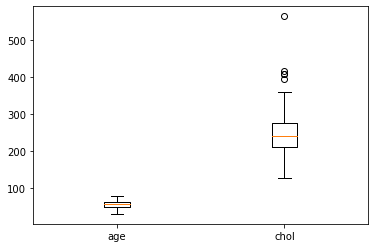

In [27]:
plt.boxplot([df.age,df.chol], labels = ['age', 'chol'])
plt.show()

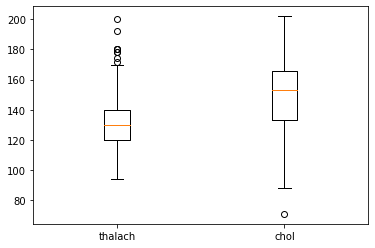

In [29]:
plt.boxplot([df.trestbps,df.thalach], labels = ['thalach', 'chol'])
plt.show()

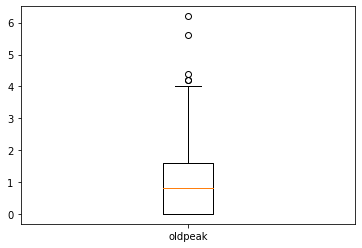

In [31]:
plt.boxplot([df.oldpeak], labels = ['oldpeak'])
plt.show()

In [48]:
continuous_iqr = df
continuous_iqr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [49]:
Q1 = continuous_iqr.quantile(0.25)
Q3 = continuous_iqr.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


age         13.5
sex          1.0
cp           2.0
trestbps    20.0
chol        63.5
fbs          0.0
restecg      1.0
thalach     32.5
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64


In [50]:
print(continuous_iqr < (Q1 - 1.5 * IQR)) | (continuous_iqr > (Q3 + 1.5 * IQR))

       age    sex     cp  trestbps   chol    fbs  restecg  thalach  exang  \
0    False  False  False     False  False  False    False    False  False   
1    False  False  False     False  False  False    False    False  False   
2    False  False  False     False  False  False    False    False  False   
3    False  False  False     False  False  False    False    False  False   
4    False  False  False     False  False  False    False    False  False   
..     ...    ...    ...       ...    ...    ...      ...      ...    ...   
298  False  False  False     False  False  False    False    False  False   
299  False  False  False     False  False  False    False    False  False   
300  False  False  False     False  False  False    False    False  False   
301  False  False  False     False  False  False    False    False  False   
302  False  False  False     False  False  False    False    False  False   

     oldpeak  slope     ca   thal  target  
0      False  False  False  Fal

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [51]:
df_clean = continuous_iqr[~((continuous_iqr < (Q1 - 1.5 * IQR)) | (continuous_iqr > (Q3 + 1.5 *IQR))).any(axis=1)]

In [52]:
df_clean.shape

(228, 14)

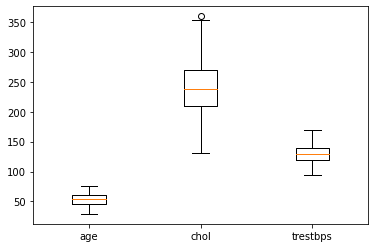

In [54]:
plt.boxplot([df_clean.age,df_clean.chol, df_clean.trestbps] , labels = ['age' , 'chol', 'trestbps'])
plt.show()

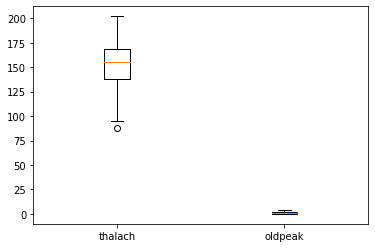

In [55]:
plt.boxplot([df_clean.thalach,df_clean.oldpeak] , labels = ['thalach' , 'oldpeak'])
plt.show()

# 4. Binned the continuous column values apart from the 'oldpeak' column

In [56]:
df_clean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [57]:
df_clean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [58]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

le = LabelEncoder()


In [59]:
# Using adaptive binning to the continuous columns('age', 'trestbps', 'chol', 'thalach')
df_clean['age_binned'] = pd.qcut(df_clean.age, q=[0, .25, .50, .75, 1])
df_clean['trestbps_binned'] = pd.qcut(df_clean.trestbps, q=[0, .25, .50, .75, 1])
df_clean['chol_binned'] = pd.qcut(df_clean.chol, q=[0, .25, .50, .75, 1])
df_clean['thalach_binned'] = pd.qcut(df_clean.thalach, q=[0, .25, .50, .75, 1])

df_clean.drop(columns=['age', 'trestbps', 'chol', 'thalach'], inplace=True)

In [60]:
# Each category is divided into 5 categories and the Label encoder can now be applied without bias
df_clean['age'] = le.fit_transform(df_clean['age_binned'])
df_clean['trestbps'] = le.fit_transform(df_clean['trestbps_binned'])
df_clean['chol'] = le.fit_transform(df_clean['chol_binned'])
df_clean['thalach'] = le.fit_transform(df_clean['thalach_binned'])

df_clean.drop(columns=['age_binned','trestbps_binned', 'chol_binned', 'thalach_binned'],inplace=True)

df_clean.head()

,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,target,age,trestbps,chol,thalach
1,1,2,0,1,0,3.5,0,0,2,1,0,1,2,3
2,0,1,0,0,0,1.4,2,0,2,1,0,1,0,3
3,1,1,0,1,0,0.8,2,0,2,1,2,0,1,3
4,0,0,0,1,1,0.6,2,0,2,1,2,0,3,2
5,1,0,0,1,0,0.4,1,0,1,1,2,2,0,1


# 5. Separating features from the labels using appropriate feature selection techniques

In [61]:
df_clean.head()

,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,target,age,trestbps,chol,thalach
1,1,2,0,1,0,3.5,0,0,2,1,0,1,2,3
2,0,1,0,0,0,1.4,2,0,2,1,0,1,0,3
3,1,1,0,1,0,0.8,2,0,2,1,2,0,1,3
4,0,0,0,1,1,0.6,2,0,2,1,2,0,3,2
5,1,0,0,1,0,0.4,1,0,1,1,2,2,0,1


In [62]:
X = df_clean.drop("target",1) # Feature Matrix
y = df_clean["target"] # Target Variable
df_clean

,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,target,age,trestbps,chol,thalach
1,1,2,0,1,0,3.5,0,0,2,1,0,1,2,3
2,0,1,0,0,0,1.4,2,0,2,1,0,1,0,3
3,1,1,0,1,0,0.8,2,0,2,1,2,0,1,3
4,0,0,0,1,1,0.6,2,0,2,1,2,0,3,2
5,1,0,0,1,0,0.4,1,0,1,1,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0,0,0,1,1,0.0,1,0,2,0,3,1,0,0
298,0,0,0,1,1,0.2,1,0,3,0,2,2,2,0
299,1,3,0,1,0,1.2,1,0,3,0,0,0,2,0
301,1,0,0,1,1,1.2,1,1,3,0,2,1,0,0


In [63]:
X = df_clean.drop("target", 1)
y = df_clean["target"]

In [64]:
import statsmodels.api as sm
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const       5.938625e-14
sex         4.886314e-05
cp          3.073289e-04
fbs         4.357150e-07
restecg     5.260204e-01
exang       1.957276e-01
oldpeak     8.919590e-02
slope       1.395549e-02
ca          6.712757e-06
thal        2.205305e-06
age         5.907722e-01
trestbps    2.740279e-01
chol        5.101141e-01
thalach     2.464373e-01
dtype: float64

In [65]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['sex', 'cp', 'fbs', 'oldpeak', 'slope', 'ca', 'thal']


In [66]:
X

,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,age,trestbps,chol,thalach
1,1,2,0,1,0,3.5,0,0,2,0,1,2,3
2,0,1,0,0,0,1.4,2,0,2,0,1,0,3
3,1,1,0,1,0,0.8,2,0,2,2,0,1,3
4,0,0,0,1,1,0.6,2,0,2,2,0,3,2
5,1,0,0,1,0,0.4,1,0,1,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0,0,0,1,1,0.0,1,0,2,3,1,0,0
298,0,0,0,1,1,0.2,1,0,3,2,2,2,0
299,1,3,0,1,0,1.2,1,0,3,0,0,2,0
301,1,0,0,1,1,1.2,1,1,3,2,1,0,0


In [67]:
y

1      1
2      1
3      1
4      1
5      1
      ..
296    0
298    0
299    0
301    0
302    0
Name: target, Length: 228, dtype: int64

Using the backward elimination model, 9 features has been selected as the best perfoming features

# 6. Slicing the data and scaling features

In [68]:
df_clean.shape

(228, 14)

In [69]:
slice_options = {'length_of each_column': ['10', '20']}
slice_options = pd.DataFrame(data=slice_options)

data = df_clean

# store data frames in list
out_data = list(range(slice_options.shape[0]))

count = 0
for index, row in slice_options.iterrows():
    # create empty data frame
    out_data[count] = pd.DataFrame()
    # collect data
    for i in range(data.shape[0]):
        # select data rows
        select_data = data.iloc[i:i+int(row.values[0])]
        # handle rows number
        if select_data.shape[0] == int(row.values[0]):
            # fill data frame
            out_data[count]['column' + str(i)] = select_data.values.ravel()
    count += 1

out_data

[     column0  column1  column2  column3  column4  column5  column6  column7  \
 0        1.0      0.0      1.0      0.0      1.0      0.0      1.0      1.0   
 1        2.0      1.0      1.0      0.0      0.0      1.0      1.0      2.0   
 2        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
 3        1.0      0.0      1.0      1.0      1.0      0.0      1.0      1.0   
 4        0.0      0.0      0.0      1.0      0.0      0.0      0.0      0.0   
 ..       ...      ...      ...      ...      ...      ...      ...      ...   
 135      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
 136      1.0      1.0      3.0      1.0      2.0      3.0      0.0      3.0   
 137      1.0      1.0      0.0      0.0      0.0      3.0      3.0      2.0   
 138      3.0      2.0      1.0      1.0      3.0      1.0      2.0      1.0   
 139      1.0      3.0      1.0      2.0      3.0      0.0      3.0      1.0   
 
      column8  column9  ...  column209

In [70]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 1 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       228 non-null    int64  
 1   cp        228 non-null    int64  
 2   fbs       228 non-null    int64  
 3   restecg   228 non-null    int64  
 4   exang     228 non-null    int64  
 5   oldpeak   228 non-null    float64
 6   slope     228 non-null    int64  
 7   ca        228 non-null    int64  
 8   thal      228 non-null    int64  
 9   target    228 non-null    int64  
 10  age       228 non-null    int32  
 11  trestbps  228 non-null    int32  
 12  chol      228 non-null    int32  
 13  thalach   228 non-null    int32  
dtypes: float64(1), int32(4), int64(9)
memory usage: 23.2 KB


In [71]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_clean[columns_to_scale] = standardScaler.fit_transform(df_clean[columns_to_scale])

# 7. Data balancing (checking if it balanced and if not, sampling the data using the most appropriate method whilst keeping size in mind)

In [72]:
a_target_0 = df_clean[df_clean.target == 0].target.count() / df_clean.target.count()
a_target_1 = df_clean[df_clean.target == 1].target.count() / df_clean.target.count()

print(a_target_0)
print(a_target_1)

0.42105263157894735
0.5789473684210527


In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((171, 13), (57, 13), (171,), (57,))

In [74]:
from imblearn.over_sampling import SMOTE
from collections import Counter

oversample = SMOTE()

X_train, y_train = oversample.fit_resample(X_train, y_train)
print(Counter(y_train))

Counter({1: 101, 0: 101})


In [75]:
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
oversample= SMOTE(random_state=42)
X_train, y_train= oversample.fit_resample(X_train, y_train)
print(Counter(y_train))

Counter({1: 101, 0: 101})


In [83]:
#Apply to X_test_set
X_test, y_test = oversample.fit_resample(X_test, y_test)
print(Counter(y_test))


#Apply to x_b set

X_train, y_train = oversample.fit_resample(X_train, y_train)
print(Counter(y_train))

X_test, y_test = oversample.fit_resample(X_test, y_test)
print(Counter(y_test))

Counter({0: 31, 1: 31})
Counter({1: 101, 0: 101})
Counter({0: 31, 1: 31})


# 8. Identifying the best machine learning model using training and testing accuracy scores(at least 4 Classification models)

# Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

In [85]:
logisticreg = LogisticRegression()

In [87]:
logisticreg.fit(X_train, y_train)

LogisticRegression()

In [88]:
logisticreg.score(X_test,y_test)

0.7580645161290323

In [89]:
score = logisticreg.score(X_test, y_test)
print(score)

0.7580645161290323


In [90]:
from sklearn import metrics
predictions = logisticreg.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[17 14]
 [ 1 30]]


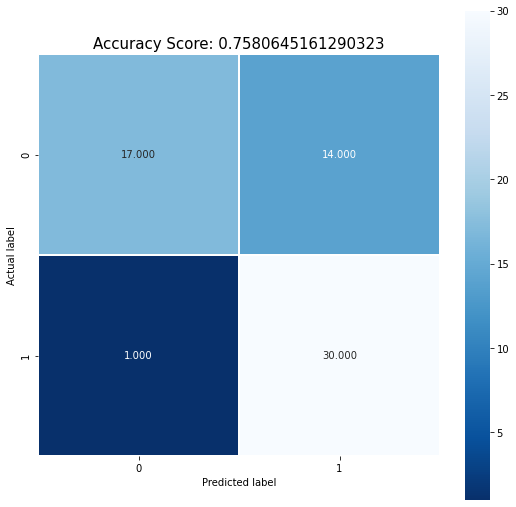

In [91]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# Random Forest Classifier

In [92]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [93]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(n_estimators=10)

In [94]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [96]:
from sklearn.metrics import confusion_matrix
print('accuracy oy model is : ', accuracy_score(y_test, y_pred))
print('Confusion Matrix:','\n', confusion_matrix(y_test, y_pred))

accuracy oy model is :  0.7741935483870968
Confusion Matrix: 
 [[19 12]
 [ 2 29]]


# SVC

In [97]:
x, y = make_classification(n_samples=5000, n_features=10, 
                           n_classes=3, 
                           n_clusters_per_class=1)

In [98]:
svc = SVC()
print(svc)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC()


SVC()

In [99]:
svc.fit(X_train, y_train)
score = svc.score(X_train, y_train)
print("Score: ", score)

Score:  0.900990099009901


In [100]:

y_pred = svc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[18 13]
 [ 7 24]]


In [101]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.72      0.58      0.64        31
           1       0.65      0.77      0.71        31

    accuracy                           0.68        62
   macro avg       0.68      0.68      0.67        62
weighted avg       0.68      0.68      0.67        62



# K Nearest Neighbors


In [103]:
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [104]:
KNN_prediction = KNN_model.predict(X_test)
print(accuracy_score(KNN_prediction, y_test))
print(classification_report(KNN_prediction, y_test))

0.7741935483870968
              precision    recall  f1-score   support

           0       0.71      0.81      0.76        27
           1       0.84      0.74      0.79        35

    accuracy                           0.77        62
   macro avg       0.77      0.78      0.77        62
weighted avg       0.78      0.77      0.78        62



 SVC perfomed better that RandomClassifier and Logistic Regression  with an accuracy score of 90%

# 9. Hyper parameter tune the best model using grid search to identify the best perfoming model

In [121]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.488, total=   0.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.488, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.650, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.825, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.775, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.780, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.732, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.775, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.825, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.800, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.683, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.756, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.875, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.775, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.732, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.756, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.850, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.800, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.850, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] .

[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.805, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.825, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.875, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.800, total=   0.0s
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, gamma=0.1)


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    5.9s finished


In [114]:
g_search = GridSearchCV(estimator = svc, param_grid = param_grid, 
                        cv = 3, n_jobs = 1, verbose = 0,
return_train_score=True)

In [122]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.72      0.58      0.64        31
           1       0.65      0.77      0.71        31

    accuracy                           0.68        62
   macro avg       0.68      0.68      0.67        62
weighted avg       0.68      0.68      0.67        62



# 10.  Training and evaluating model using:
   # a. A classification report

In [127]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [128]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
print(f"Accuracy: {round(accuracy_score(y_test, y_pred), 2)}") 
print(f"Precision: {round(precision_score(y_test, y_pred), 2)}")
print(f"Recall: {round(recall_score(y_test, y_pred), 2)}")
print(f"F1_score: {round(f1_score(y_test, y_pred), 2)}")

Accuracy: 0.68
Precision: 0.65
Recall: 0.77
F1_score: 0.71


In [129]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.58      0.64        31
           1       0.65      0.77      0.71        31

    accuracy                           0.68        62
   macro avg       0.68      0.68      0.67        62
weighted avg       0.68      0.68      0.67        62



# b. Visual representation and detailed confusion matrix

<AxesSubplot:>

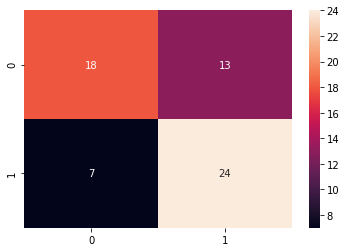

In [123]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

In [139]:
Xi = df_clean.drop('target', axis = 1)
yi = df_clean['target']

Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, test_size = 0.4, random_state = 0)
# Create a Support Vector Machine object.
svmi = SVC()

# Fit the model to the train set.
svmi.fit(Xi_train, yi_train)

SVC()

In [140]:
# Predict the classes on the test set.
yi_predict = svmi.predict(Xi_test)

<AxesSubplot:>

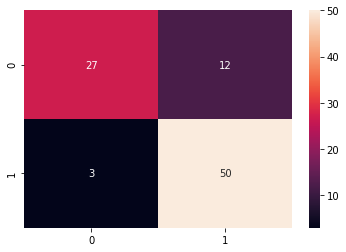

In [141]:
sns.heatmap(confusion_matrix(yi_test, yi_predict), annot = True)

In [142]:
print(classification_report(yi_test, yi_predict))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78        39
           1       0.81      0.94      0.87        53

    accuracy                           0.84        92
   macro avg       0.85      0.82      0.83        92
weighted avg       0.85      0.84      0.83        92



# c and d. AUC Score and ROC

In [153]:
# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

In [155]:

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [156]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.8917793964620186 0.809573361082206


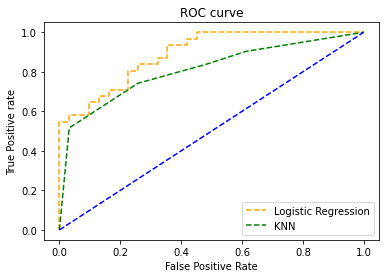

In [157]:
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In the above graph it shows that Logistic Regression did a better job of classfying the patients. The AUC for the yellow line is greater than that for the green line 

In [151]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model1, open(filename, 'wb'))

In [152]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7580645161290323
